# 训练和可视化决策树

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data[:, 2:]  # 花瓣长和宽两个属性
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2)

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file=r'C:\Users\hasee\OneDrive\桌面\机器学习实战\机器学习实战\iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
    )

In [7]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

CMD cd进入输出.dot文件目录下，dot -Tpdf 【文件名】.dot -o tree.【pdf/png】 可以选择输出pdf或png在指定目录

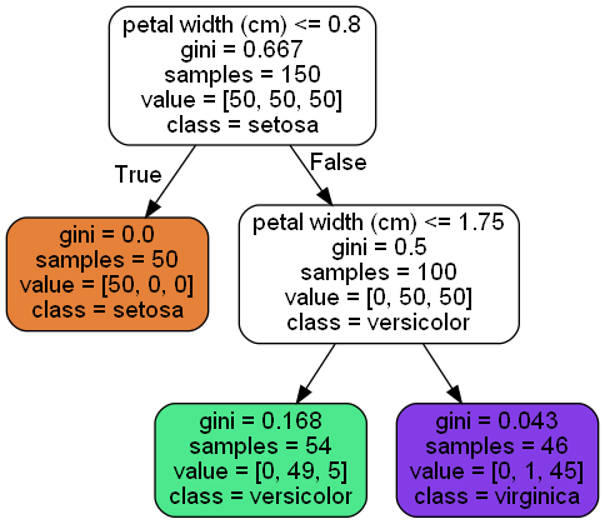

# 做出预测

决策树的特点之一是它们几乎无须数据准备，即不需要特征缩放或者居中处理（标准化）

基尼系数表示基尼不纯度，即该分类的不纯度，如果只有一类（纯），则为0

基尼不纯度： $G_i = 1-\sum^{n}_{k=1}p^2_{i,k}$

$ p_{i,k} $表示第i个节点中训练实例之间的$k$类实例的比率，如第二层$value=[0, 49, 5]$，则$p_1=\frac{0}{54}, p_2=\frac{49}{54}, p_3=\frac{5}{54}\\ G_i = 1-p_1-p_2-p_3 = 0.168$

> sklearn使用的是CART算法，仅生成二叉树，其他一些算法（如ID3）可以生成两个以上的子节点

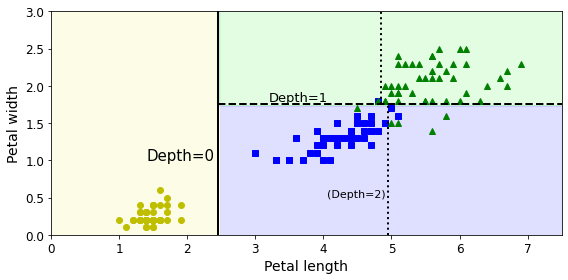

上图展示了每一层的划分情况，深度从0（根节点）开始算，每一层划分一次

决策树是白盒子模型，其内部决策方案是直观并且易于解释的，神经网络或随机森林等属于黑盒模型，很难解释模型为什么会做出如此预测。

# 估计类概率

In [10]:
tree_clf.predict_proba([[5, 1.5]])  # 输出每一类的概率情况，就是前面提到的Pi

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
tree_clf.predict([[5, 1.5]])  # 做出预测时，输出概率最高的一类

array([1])

# CART训练算法

* CART成本函数：
    
    $
    J(k, t_k)=\frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}
    $

    $
    G_{left/right}表示左或右子集的不纯度\\
    m_{left/right}表示左或右子集的实例数
    $


* 可见，$G_{left/right}$或$m_{left/right}$越高，成本越大


* 这里可以用超参数max_depth定义深度

# 计算复杂度

决策树通常是平衡的，遍历决策树需要大约$O(log_2^m)$个节点，与特征数量无关，处理大型数据集也比较快

设置max_features可以控制特征数量

presort=Ture 可以做预排序

# 基尼不纯度或熵

默认采用基尼不纯度进行测量，也可以将超参数criterion设置为'entropy'来选择熵作为不纯度的测量方式

熵的计算公式 $G_i = -\sum^{n}_{k=1}p^2_{i,k}×log_{2}^{p_{i,k}},(p_{i,k}≠0)$

基尼不纯度的计算稍微快一点，倾向于从树枝中分裂出最常见的类别，而熵倾向于生成更平衡的树

# 正则化超参数

决策树如果不加以限制，则树形结构会跟随训练集变化，严密拟合，从而造成过拟合，称为非参数模型（不是说不包含参数，它通常含有很多参数），在训练之前没有确定参数的数量，导致模型结构自由紧密贴近数据。而参数模型则有预先设定好的一部分参数，因此其自由度受限，降低了过拟合的风险（同时最佳欠拟合的风险）

为了避免过拟合，需要降低决策树的自由度，也就是正则化。

正则化的超参数取决于使用的模型，但是通常，至少可以限制决策树的最大深度。
```
1. max_depth 控制深度

2. min_samples_split 分裂前节点必须有的最小样本数

3. min_samples_leaf 叶节点必须有的最小样本数量

4. min_weight_fraction_leaf 加权实例总数站别

5. max_leaf_modes 最大叶节点数量

6. max_features 每个节点评估的最大特征数量
```
增大超参数$min\_*$或减少$max\_*$将使得模型正则化

# 回归

In [12]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x, y)

DecisionTreeRegressor(max_depth=2)

In [13]:
export_graphviz(
    tree_reg,
    out_file=r'C:\Users\hasee\OneDrive\桌面\机器学习实战\机器学习实战\iris_tree_reg.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
    )

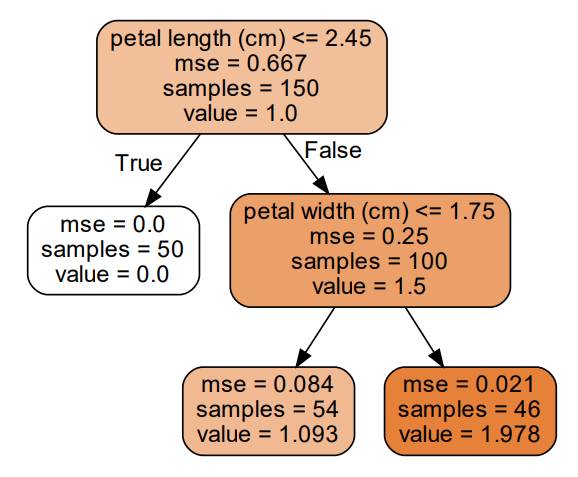

每个节点不再判断类，而是判断值，最后归类到具体取值并给出标准差

## 回归成本函数

$
J(k, t_k)=\frac{m_{left}}{m}MSE_{left}+\frac{m_{right}}{m}MSE_{right}\\ \\ \\
其中\begin{cases} MSE_{node}=\sum_{i\in node}(\hat{y}_{node}-y^{(i)})^2\\ \hat{y}_{node}=\frac{\sum_{i\in node}y^{(i)}}{m_{node}}  \end{cases}
$

```
最好设置 min_samples_leaf（ = 10 ）避免过拟合
```

# 不稳定性

决策树对于训练集旋转和训练数据中的小变化非常敏感，并且算法是随机的，即便是同一个训练集也可能有不同的模型，除非用random_state进行设置